<a href="https://colab.research.google.com/github/dearsanshui/data_exploration/blob/main/Sweden_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's explore the Covid-19 situation in Sweden.
Data provided by [JHU CSSE](https://github.com/CSSEGISandData/COVID-19) is used for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from tabulate import tabulate

Load the data from github csv files and explore the data a little bit. For example, let's take a look at the data of Sweden and Denmark.

In [2]:
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
death_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

confirmed_df_org = pd.read_csv(confirmed_url, error_bad_lines=False)
death_df_org = pd.read_csv(death_url, error_bad_lines=False)
recovered_df_org = pd.read_csv(recovered_url, error_bad_lines=False) 

print(confirmed_df_org.loc[confirmed_df_org['Country/Region'] == 'Sweden'])
print(death_df_org.loc[death_df_org['Country/Region'] == 'Sweden'])
print(recovered_df_org.loc[recovered_df_org['Country/Region'] == 'Sweden'])

    Province/State Country/Region        Lat  ...  10/15/20  10/16/20  10/17/20
231            NaN         Sweden  60.128161  ...    102407    103200    103200

[1 rows x 274 columns]
    Province/State Country/Region        Lat  ...  10/15/20  10/16/20  10/17/20
231            NaN         Sweden  60.128161  ...      5910      5918      5918

[1 rows x 274 columns]
    Province/State Country/Region        Lat  ...  10/15/20  10/16/20  10/17/20
218            NaN         Sweden  60.128161  ...         0         0         0

[1 rows x 274 columns]


By looking at the datasets, we found that:
*   The three datasets are Cumulative-data.
*   Province/State information is not available for Sweden while avaiable for Denmark.
*   Recovered data is not available for Sweden while avaiable for Denmark.

In order to explore specific country, we will aggregate all its provincial data for that country. Before that, we will remove "Province/State", "Lat","Long" since we are not going to use these fields. 






In [3]:
confirmed_df = confirmed_df_org.drop(['Province/State','Lat','Long'], axis=1)
confirmed_df = confirmed_df.groupby("Country/Region").sum()
confirmed_df.columns = pd.to_datetime(confirmed_df.columns, format='%m/%d/%y')
death_df = death_df_org.drop(['Province/State','Lat','Long'], axis=1)
death_df = death_df.groupby("Country/Region").sum()
death_df.columns = pd.to_datetime(death_df.columns, format='%m/%d/%y')
recovered_df = recovered_df_org.drop(['Province/State','Lat','Long'], axis=1)
recovered_df = recovered_df.groupby("Country/Region").sum()
recovered_df.columns = pd.to_datetime(recovered_df.columns, format='%m/%d/%y')

In [4]:
# confirmed_df.head()

In [5]:
# death_df.head()

In [6]:
# recovered_df.head()

In [7]:
# set the country or region we are going to explore as c_or_r
c_or_r = 'Sweden'  

In [8]:
confirmed_c = confirmed_df.loc[c_or_r]
confirmed_c = confirmed_c[confirmed_c > 0]
death_c = death_df.loc[c_or_r]
death_c = death_c[death_c > 0]
current_date = confirmed_c.index[-1]
recovered_c = recovered_df.loc[c_or_r]
recovered_c = recovered_c[recovered_c > 0]

table = list()
table.append(['Country', '{}'.format(c_or_r)])
table.append(['Date', '{:%Y-%m-%d}'.format(current_date)])
table.append(['Total cases', '{:,}'.format(confirmed_c.iloc[-1])])
table.append(['Total deaths', death_c.iloc[-1]])
if not recovered_c.empty:
  table.append(['Total recovered', recovered_c.iloc[-1]])
table.append(['Increase on current day', int(confirmed_c.diff().iloc[-1])])
print(tabulate(table, tablefmt="grid"))

+-------------------------+------------+
| Country                 | Sweden     |
+-------------------------+------------+
| Date                    | 2020-10-17 |
+-------------------------+------------+
| Total cases             | 103,200    |
+-------------------------+------------+
| Total deaths            | 5918       |
+-------------------------+------------+
| Increase on current day | 0          |
+-------------------------+------------+


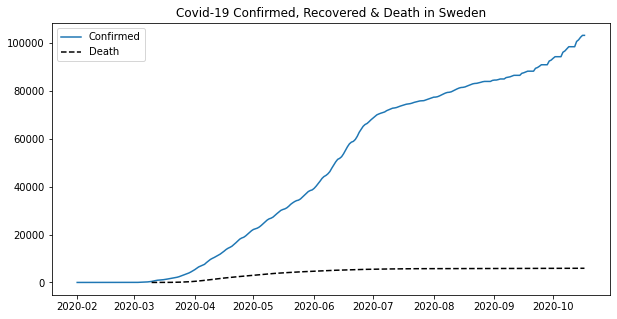

In [9]:
plt.figure(figsize=(10,5))
plt.title('Covid-19 Confirmed, Recovered & Death in {}'.format(c_or_r))
plt.plot(confirmed_c.index, confirmed_c, label='Confirmed')  
plt.plot(death_c.index, death_c, color='black', linestyle='dashed', label='Death') 
if not recovered_c.empty:
  plt.plot(recovered_c.index, recovered_c, color='green', linestyle='dashed', label='Recovered') 
plt.legend(loc='upper left')
plt.show()

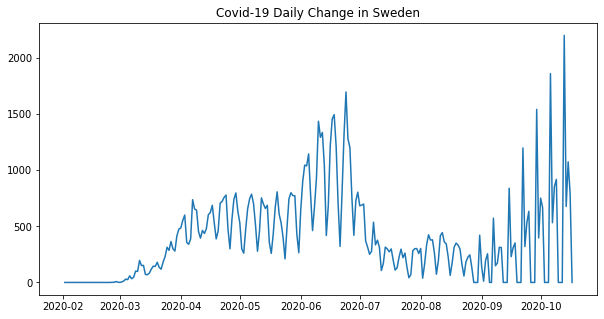

In [10]:
confirmed_change = confirmed_c.diff()
plt.figure(figsize=(10,5))
plt.title('Covid-19 Daily Change in {}'.format(c_or_r))
plt.plot(confirmed_change.index, confirmed_change)  
plt.show()